In [9]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

samsung = fdr.DataReader("005930", start = "2020-01-01", end = "2023-12-31")

In [55]:
window = 20
samsung['mean'] = samsung['Close'].rolling(window=window).mean()
samsung['std'] = samsung['Close'].rolling(window=window).std()

samsung['UB'] = samsung['mean'] + 1.5 * samsung['std'] 
samsung['LB'] = samsung['mean'] - 1.5 * samsung['std'] 

samsung['Momentum'] = samsung['Close'].pct_change(10)  

In [57]:
buy_signal = (samsung['Close'] < samsung['LB']) & (samsung['Momentum'] > -0.05)  
sell_signal = (samsung['Close'] > samsung['UB']) & (samsung['Momentum'] < 0.05) 

samsung['Position'] = 0  
samsung.loc[buy_signal, 'Position'] = 1  
samsung.loc[sell_signal, 'Position'] = -1  

cond2 = samsung['Position'].shift(1).fillna(False)
s = samsung.loc[cond2 == 1, 'Close'] / samsung.loc[cond2 == 1, 'Open']

In [59]:
samsung['Daily Return'] = samsung['Close'].pct_change()  
samsung['Strategy Return'] = samsung['Daily Return'] * samsung['Position'].shift(1) 
samsung['Cumulative Strategy Return'] = (1 + samsung['Strategy Return']).cumprod()

print(s.cumprod())

Date
2020-02-25    1.030249
2020-03-10    1.045569
2020-05-13    1.074336
2020-10-30    1.048404
2020-11-02    1.066992
                ...   
2023-08-14    1.205113
2023-08-16    1.210534
2023-08-18    1.216036
2023-08-21    1.216036
2023-10-11    1.208946
Length: 75, dtype: float64


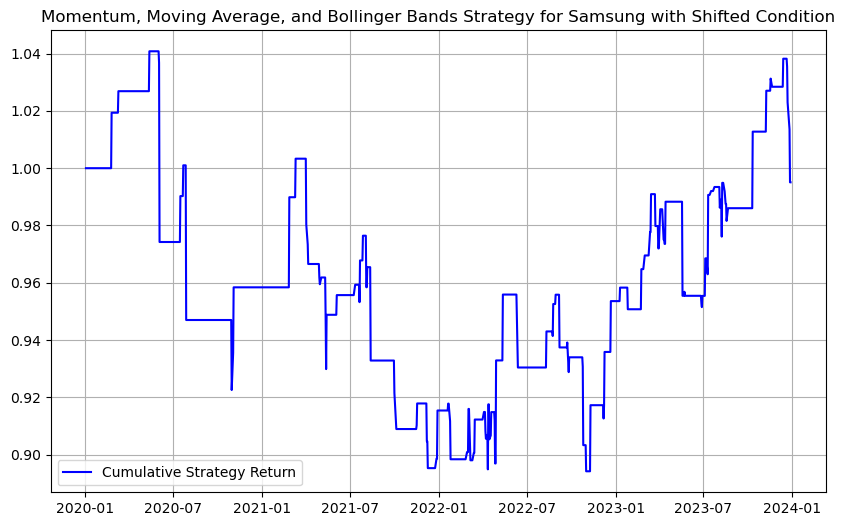

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(samsung['Cumulative Strategy Return'], label='Cumulative Strategy Return', color='blue')
plt.title('Momentum, Moving Average, and Bollinger Bands Strategy for Samsung with Shifted Condition')
plt.legend()
plt.grid(True)
plt.show()